In [7]:
import pandas as pd
df=pd.read_csv('train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [12]:
messages=df.copy()

In [13]:
messages=messages.dropna()

In [14]:
messages.reset_index(inplace=True)

In [15]:
Y=messages['label']

In [16]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [17]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

ps = PorterStemmer()
corpus = []

for i in range(0, len(messages)):
    message= str(messages['title'][i])
    review = re.sub('[^a-zA-Z]', ' ', message)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [18]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [19]:
## Divide the dataset into Train and Test
X.shape

(18285, 5000)

In [20]:
y=messages['label']
y

0        1
1        0
2        1
3        1
4        1
        ..
18280    0
18281    0
18282    0
18283    1
18284    1
Name: label, Length: 18285, dtype: int64

In [21]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [22]:
cv.get_feature_names_out()[:20]

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut', 'abstain', 'absurd', 'abus',
       'abus new', 'abus new york', 'academi', 'accept', 'access',
       'access pipelin', 'access pipelin protest'], dtype=object)

In [23]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names_out())

In [24]:
import matplotlib.pyplot as plt

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# MultinomialNB Algorithm

accuracy:   0.881
Confusion matrix, without normalization


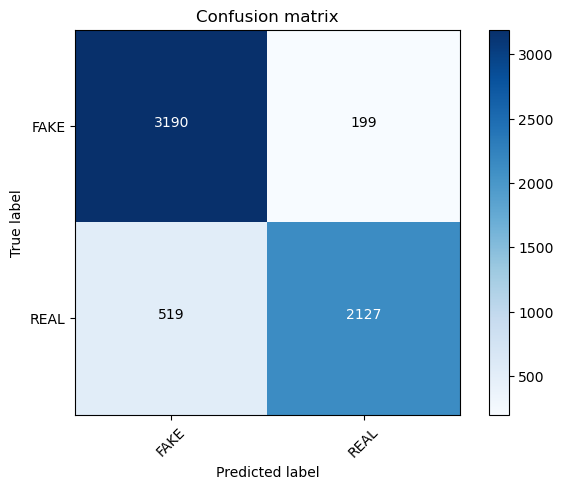

In [26]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

from sklearn import metrics
import numpy as np
import itertools

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# Passive Aggressive Classifier Algorithm

accuracy:   0.917
Confusion matrix, without normalization


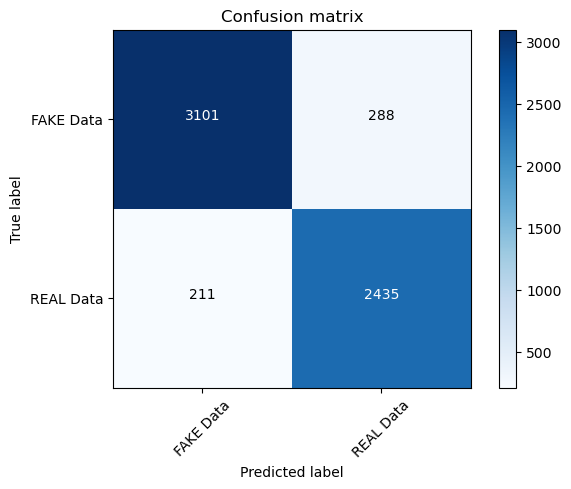

In [27]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

# Multinomial Classifier with Hyperparameter

In [28]:
classifier=MultinomialNB(alpha=0.1)
previous_score=0

for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.0, Score : 0.8662800331400166
Alpha: 0.1, Score : 0.8777133388566695
Alpha: 0.2, Score : 0.8801988400994201
Alpha: 0.30000000000000004, Score : 0.87986743993372
Alpha: 0.4, Score : 0.8808616404308203
Alpha: 0.5, Score : 0.8806959403479702
Alpha: 0.6000000000000001, Score : 0.8815244407622204
Alpha: 0.7000000000000001, Score : 0.8813587406793704
Alpha: 0.8, Score : 0.8816901408450705
Alpha: 0.9, Score : 0.8816901408450705


In [29]:
list(sorted(zip(classifier.feature_log_prob_[0], cv.get_feature_names_out()),reverse=True))
#the morde the coefficent value, More the impact in prediction by model 

[(-3.9497603498825393, 'new'),
 (-3.9689481006947727, 'york'),
 (-3.969032969681349, 'new york'),
 (-3.9728936199761264, 'time'),
 (-3.979866660651135, 'york time'),
 (-3.979866660651135, 'new york time'),
 (-4.6215808113530885, 'breitbart'),
 (-4.797902430598906, 'trump'),
 (-5.666344542746281, 'donald'),
 (-5.669113589614728, 'donald trump'),
 (-6.0459788417963765, 'say'),
 (-6.244307613966833, 'obama'),
 (-6.323461418144095, 'presid'),
 (-6.352839646565577, 'state'),
 (-6.356125020747031, 'attack'),
 (-6.388987201018693, 'report'),
 (-6.448929663358422, 'hous'),
 (-6.45906496727267, 'clinton'),
 (-6.5372098092978606, 'brief'),
 (-6.577300430009248, 'kill'),
 (-6.591277465688973, 'die'),
 (-6.614822613302324, 'year'),
 (-6.619912736488095, 'call'),
 (-6.625086822112368, 'news'),
 (-6.655682805002153, 'plan'),
 (-6.65950828633275, 'hillari clinton'),
 (-6.663048955837757, 'get'),
 (-6.668798330587439, 'brief new york'),
 (-6.668798330587439, 'brief new'),
 (-6.668883000715034, 'bill')